# Homework 6

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set : This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [447]:
import pandas as pd;
import numpy as np;

In [448]:
import warnings
warnings.filterwarnings('ignore')

In [449]:
#read file into dataframe
dataset = pd.read_csv("wdbc.data", header = None)
dataset = dataset.iloc[:,1:]
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [450]:
# a method to split dataset
from sklearn.model_selection import StratifiedShuffleSplit
def split_dataset(dataset_x, dataset_y, test_size, random):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state = random)

    for train_index, test_index in sss.split(dataset_x, dataset_y):
        train_x, test_x = dataset_x.iloc[train_index,:], dataset_x.iloc[test_index,:]
        train_y, test_y = dataset_y.iloc[train_index], dataset_y.iloc[test_index]
    train_x = train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)
    return train_x, train_y, test_x, test_y

In [451]:
#split into training data and test data
dataset_x = dataset.iloc[:,1:]
dataset_y = dataset[1].apply(lambda x: 1 if x == 'M' else 0)
train_x, train_y, test_x, test_y = split_dataset(dataset_x, dataset_y, test_size = 0.2, random = 0)
train_x.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.020740,0.2003,0.06246,...,12.090,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
1,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,11.950,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
2,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,0.1339,0.05945,...,13.330,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
3,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,0.1305,0.07163,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.15440,0.03846,0.1652,0.07722
4,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400


## (b) Monte-Carlo Simulation: 
    Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning: 
    Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [452]:
#normailze dataset_x
from sklearn.preprocessing import normalize
normalize_dataset_x = pd.DataFrame(normalize(dataset_x))

In [453]:
normalize_dataset_x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,...,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,...,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,...,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,...,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [454]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [465]:
def supersived_learning():
    result = list()
    plot_inf = list()
    #split dataset randomly
    train_x, train_y, test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2, random = None)
    #use cv to find best param
    parameters = {'C': np.power(10, np.arange(-3, 7, 0.5))}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(train_x, train_y)
    best_c = clf.best_params_['C']
    
    #build model with best C
    svc = LinearSVC(penalty='l1', dual=False, C = best_c)
    svc.fit(train_x, train_y)
    
    #Accuracy
    train_accuracy = svc.score(train_x, train_y)
    test_accuracy = svc.score(test_x, test_y)
    result.append(train_accuracy)
    result.append(test_accuracy)
    
    # confusion matrix
    train_predict = svc.predict(train_x)
    test_predict = svc.predict(test_x)
    train_cm = confusion_matrix(train_y, train_predict)
    test_cm = confusion_matrix(test_y, test_predict)
    plot_inf.append(train_cm)
    plot_inf.append(test_cm)
    
    #precision
    train_tn, test_tn = train_cm[0][0], test_cm[0][0]; 
    train_fp, test_fp = train_cm[0][1], test_cm[0][1]; 
    train_fn, test_fn = train_cm[1][0], test_cm[1][0]; 
    train_tp, test_tp = train_cm[1][1], test_cm[1][1];
    train_precision = train_tp/(train_tp + train_fp)
    test_precision = test_tp/(test_tp + test_fp)
    result.append(train_precision)
    result.append(test_precision)
    
    #recall
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    result.append(train_recall)
    result.append(test_recall)
    
    #F-score
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    result.append(train_f1)
    result.append(test_f1)
    
    # AUC
    train_predict_prob = svc.decision_function(train_x)
    test_predict_prob = svc.decision_function(test_x)
    plot_inf.append(train_predict_prob)
    plot_inf.append(test_predict_prob)
    train_auc = roc_auc_score(train_y, train_predict_prob)
    test_auc = roc_auc_score(test_y, test_predict_prob)
    result.append(train_auc)
    result.append(test_auc)
    
    return result, plot_inf

In [466]:
col = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 
       'train_recall', 'test_recall', 'train_f1', 
       'test_f1', 'train_auc', 'test_auc']
inf = list();
supervised_result = pd.DataFrame(columns=col, index=range(30))
for i in range(30):
    res, plot_inf = supersived_learning()
    inf = plot_inf
    supervised_result.loc[i] = res

In [467]:
print("The result of Supersived Learning:")
supervised_result.mean()

The result of Supersived Learning:


train_accuracy     0.982125
test_accuracy      0.968129
train_precision    0.984666
test_precision     0.961925
train_recall       0.967255
test_recall        0.952381
train_f1           0.975860
test_f1            0.956516
train_auc          0.998385
test_auc           0.994907
dtype: float64

In [473]:
#confusion matrix and ROC
#use cv to find best param
normalize_train_x, train_y, normalize_test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
parameters = {'C': np.power(10, np.arange(-3, 7, 0.5))}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(normalize_train_x, train_y)
best_c = clf.best_params_['C']
    
#build model with best C
svc = LinearSVC(penalty='l1', dual=False, C = best_c)
svc.fit(normalize_train_x, train_y)

# confusion matrix
train_predict = svc.predict(normalize_train_x)
test_predict = svc.predict(normalize_test_x)
train_cm = pd.DataFrame(confusion_matrix(train_y, train_predict), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm = pd.DataFrame(confusion_matrix(test_y, test_predict), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )

In [474]:
train_cm

,Predict No,Predict Yes
Actual No,281,4
Actual Yes,8,162


In [475]:
test_cm

,Predict No,Predict Yes
Actual No,70,2
Actual Yes,1,41


In [476]:
train_predict_prob = svc.decision_function(normalize_train_x)
test_predict_prob = svc.decision_function(normalize_test_x)
train_fpr, train_tpr, train_thresholds = roc_curve(train_y, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, test_predict_prob)

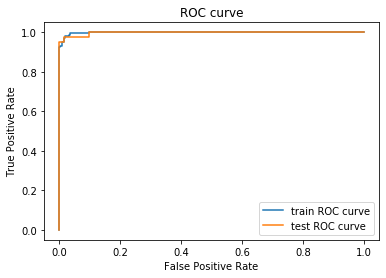

In [477]:
import matplotlib.pyplot as plt
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ii. Semi-Supervised Learning/ Self-training: 
    select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [478]:
import types;
normalize_train_x, train_y, normalize_test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
# select 50% of the positive class along with 50% of the negative class in the training set as labeled data 
label_train_x, label_train_y, unlabel_train_x, unlabel_train_y = split_dataset(normalize_train_x, train_y, 
                                                     test_size = 0.5 ,random = None)

In [480]:
#bulid model use labeled training data
parameters = {'C': np.power(10, np.arange(-3, 7, 0.5))}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(label_train_x, label_train_y)
best_c = clf.best_params_['C']
    
#build model with best C
svc = LinearSVC(penalty='l1', dual=False, C = best_c)
svc.fit(label_train_x, label_train_y)

LinearSVC(C=100000.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used.

In [481]:
def semi_supersived_learning():
    result = list()
    plot_inf = list()
    #split dataset randomly
    normalize_train_x, train_y, normalize_test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
    # select 50% of the positive class along with 50% of the negative class in the training set as labeled data 
    label_train_x, label_train_y, unlabel_train_x, unlabel_train_y = split_dataset(normalize_train_x, train_y, 
                                                     test_size = 0.5 ,random = None)
    #bulid model use labeled training data
    parameters = {'C': np.power(10, np.arange(-3, 7, 0.5))}
    svc = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(label_train_x, label_train_y)
    best_c = clf.best_params_['C']
    
    #build model with best C
    svc = LinearSVC(penalty='l1', dual=False, C = best_c)
    svc.fit(label_train_x, label_train_y)
    
    # add unlabel data into train data, retrain SVM
    while len(unlabel_train_x) > 0:

        unlabel_predict_prob = svc.decision_function(unlabel_train_x)# calculate abs distance
        abs_prob = np.abs(svc.decision_function(unlabel_train_x))
        max_idx = abs_prob.argmax() # the index which has max absolute value
        label = int(unlabel_predict_prob[max_idx] > 0) #label of this data point
        label_train_x = np.vstack([label_train_x, unlabel_train_x.iloc[max_idx,:]]) #add to training set
        label_train_y = np.append(label_train_y, label)
        unlabel_train_x = unlabel_train_x.drop(unlabel_train_x.index[max_idx]) #delete from unlabeled data
        svc.fit(label_train_x, label_train_y) # refit the model
        

    #Accuracy
    train_accuracy = svc.score(normalize_train_x, train_y)
    test_accuracy = svc.score(normalize_test_x, test_y)
    result.append(train_accuracy)
    result.append(test_accuracy)
    
    # confusion matrix
    train_predict = svc.predict(normalize_train_x)
    test_predict = svc.predict(normalize_test_x)
    train_cm = confusion_matrix(train_y, train_predict)
    test_cm = confusion_matrix(test_y, test_predict)
    plot_inf.append(train_cm)
    plot_inf.append(test_cm)
    
    #precision
    train_tn, test_tn = train_cm[0][0], test_cm[0][0]; 
    train_fp, test_fp = train_cm[0][1], test_cm[0][1]; 
    train_fn, test_fn = train_cm[1][0], test_cm[1][0]; 
    train_tp, test_tp = train_cm[1][1], test_cm[1][1];
    train_precision = train_tp/(train_tp + train_fp)
    test_precision = test_tp/(test_tp + test_fp)
    result.append(train_precision)
    result.append(test_precision)
    
    #recall
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    result.append(train_recall)
    result.append(test_recall)
    
    #F-score
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    result.append(train_f1)
    result.append(test_f1)
    
    # AUC
    train_predict_prob = svc.decision_function(normalize_train_x)
    test_predict_prob = svc.decision_function(normalize_test_x)
    plot_inf.append(train_predict_prob)
    plot_inf.append(test_predict_prob)
    train_auc = roc_auc_score(train_y, train_predict_prob)
    test_auc = roc_auc_score(test_y, test_predict_prob)
    result.append(train_auc)
    result.append(test_auc)
    
    return result, plot_inf

In [482]:
col = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 
       'train_recall', 'test_recall', 'train_f1', 
       'test_f1', 'train_auc', 'test_auc']
semi_supervised_result = pd.DataFrame(columns=col, index=range(30))
for i in range(30):
    res, plot_inf = semi_supersived_learning()
    semi_supervised_result.loc[i] = res

In [483]:
print("The result of Semi-Supersived Learning:")
semi_supervised_result.mean()

The result of Semi-Supersived Learning:


train_accuracy     0.969011
test_accuracy      0.952924
train_precision    0.967454
test_precision     0.948441
train_recall       0.949412
test_recall        0.923810
train_f1           0.958087
test_f1            0.934980
train_auc          0.992888
test_auc           0.987511
dtype: float64

In [489]:
#split dataset randomly
normalize_train_x, train_y, normalize_test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
    # select 50% of the positive class along with 50% of the negative class in the training set as labeled data 
label_train_x, label_train_y, unlabel_train_x, unlabel_train_y = split_dataset(normalize_train_x, train_y, 
                                                     test_size = 0.5 ,random = None)
    #bulid model use labeled training data
parameters = {'C': np.power(10, np.arange(-1, 5, 0.5))}
svc = LinearSVC(penalty='l1', dual=False)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(label_train_x, label_train_y)
best_c = clf.best_params_['C']
    
    #build model with best C
svc = LinearSVC(penalty='l1', dual=False, C = best_c)
svc.fit(label_train_x, label_train_y)
    
    # add unlabel data into train data, retrain SVM
while len(unlabel_train_x) > 0:

    unlabel_predict_prob = svc.decision_function(unlabel_train_x)# calculate abs distance
    abs_prob = np.abs(svc.decision_function(unlabel_train_x))
    max_idx = abs_prob.argmax() # the index which has max absolute value
    label = int(unlabel_predict_prob[max_idx] > 0) #label of this data point
    label_train_x = np.vstack([label_train_x, unlabel_train_x.iloc[max_idx,:]]) #add to training set
    label_train_y = np.append(label_train_y, label)
    unlabel_train_x = unlabel_train_x.drop(unlabel_train_x.index[max_idx]) #delete from unlabeled data
    svc.fit(label_train_x, label_train_y) # refit the model

In [490]:

# confusion matrix
train_predict = svc.predict(normalize_train_x)
test_predict = svc.predict(normalize_test_x)
train_cm = pd.DataFrame(confusion_matrix(train_y, train_predict), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm = pd.DataFrame(confusion_matrix(test_y, test_predict), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )

In [491]:
train_cm

,Predict No,Predict Yes
Actual No,282,3
Actual Yes,8,162


In [492]:
test_cm

,Predict No,Predict Yes
Actual No,68,4
Actual Yes,1,41


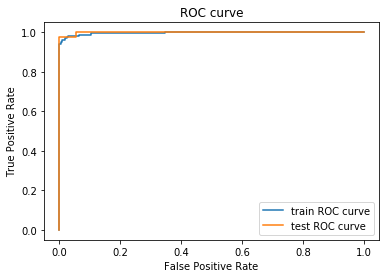

In [493]:
#ROC
train_predict_prob = svc.decision_function(normalize_train_x)
test_predict_prob = svc.decision_function(normalize_test_x)
train_fpr, train_tpr, train_thresholds = roc_curve(train_y, train_predict_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, test_predict_prob)
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### iii. Unsupervised Learning: 
    Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. 
    Make sure that you initialize the algoritm randomly.
    How do you make sure that the algorithm was not trapped in a local minimum?

In [540]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [541]:
#split dataset to do k-means
train_x, train_y, test_x, test_y = split_dataset(dataset_x, dataset_y, test_size = 0.2, random = 0)

    We can run K-means several times to avoid to trapped in a local minimum. Besides, it's important to choose random seed and cluster number

In [578]:
#build kmeans model
#Use the global random state from np.random, run 20 times
kmeans = KMeans(n_clusters=2, n_init = 50, random_state = None).fit(train_x)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

#### B. Compute the centers of the two clusters and find the closest 30 datapoints to each center. 
    Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC

In [600]:
def majority_label(dataset_x, dataset_y, cluster_index, center):
    #convert into arrays to calculate easily
    dataset_x = np.array(dataset_x)
    dataset_y = np.array(dataset_y)
    cluster = dataset_x[cluster_index]
    cluster_label = dataset_y[cluster_index] 
    cluster_distances = np.empty(0)# create a array to store distance
    for point in cluster:
        distance = np.linalg.norm(point - center)
        cluster_distances = np.append(cluster_distances, distance) ## add to list
    ranks = cluster_distances.argsort()
    cluster_label = cluster_label[ranks[:30]]
    counts = np.bincount(cluster_label)
    classify_cluster = np.argmax(counts)
    return classify_cluster

In [601]:
#cluster index
cluster_index0 = np.where(labels==0)
cluster_index1 = np.where(labels==1)

#center
center0 = centers[0]
center1 = centers[1]

#find the majority label for each cluster
majoritylabel0 = majority_label(train_x, train_y, cluster_index0, center0)
majoritylabel1 = majority_label(train_x, train_y, cluster_index1, center1)

train_predict_labels = labels
train_predict_labels[cluster_index0] = majoritylabel0
train_predict_labels[cluster_index1] = majoritylabel1

train_accuracy = accuracy_score(train_y, train_predict_labels)

print("The train accuracy is: ",round(train_accuracy,4))

The train accuracy is:  0.8901


In [581]:
train_cm = pd.DataFrame(confusion_matrix(train_y, train_predict_labels), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
train_cm

,Predict No,Predict Yes
Actual No,280,5
Actual Yes,45,125


In [582]:
#precision
train_cm = confusion_matrix(train_y, train_predict_labels)
train_tn = train_cm[0][0]; 
train_fp = train_cm[0][1]; 
train_fn = train_cm[1][0]; 
train_tp = train_cm[1][1];
train_precision = train_tp/(train_tp + train_fp)
print("Train precision is: ", round(train_precision,4))
    
#recall
train_recall = train_tp/(train_tp + train_fn)
print("Train recall is: ", round(train_recall,4))
    
#F-score
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("Train F1-score is: ", round(train_f1,4))
    

Train precision is:  0.9615
Train recall is:  0.7353
Train F1-score is:  0.8333


#### C. Classify test data based on their proximity to the centers of the clusters.
    Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [583]:
test_labels = kmeans.predict(test_x)
test_cluster_index0 = np.where(test_labels==0)
test_cluster_index1 = np.where(test_labels==1)


test_predict_labels = test_labels
test_predict_labels[test_cluster_index0] = majoritylabel0
test_predict_labels[test_cluster_index1] = majoritylabel1

In [584]:
test_accuracy = accuracy_score(test_y, test_predict_labels)
print("The test accuracy is: ",round(test_accuracy,4))

test_cm = pd.DataFrame(confusion_matrix(test_y, test_predict_labels), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm

The test accuracy is:  0.886


,Predict No,Predict Yes
Actual No,70,2
Actual Yes,11,31


In [585]:
#precision
test_cm = confusion_matrix(test_y, test_predict_labels)
test_tn = test_cm[0][0]; 
test_fp = test_cm[0][1]; 
test_fn = test_cm[1][0]; 
test_tp = test_cm[1][1];
test_precision = test_tp/(test_tp + test_fp)
print("test precision is: ", round(test_precision,4))
    
#recall
test_recall = test_tp/(test_tp + test_fn)
print("test recall is: ", round(test_recall,4))
    
#F-score
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("test F1-score is: ", round(test_f1,4))

test precision is:  0.9394
test recall is:  0.7381
test F1-score is:  0.8267


#### run KMeans cluster 30 times

In [603]:
def unsupervised():
    result = list()
    #split dataset to do k-means
    train_x, train_y, test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, test_size = 0.2, random = None)
    #build kmeans model
    #Use the global random state from np.random, run 20 times
    kmeans = KMeans(n_clusters=2, n_init=50, random_state = None).fit(train_x)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    #cluster index
    cluster_index0 = np.where(labels==0)
    cluster_index1 = np.where(labels==1)

    #center
    center0 = centers[0]
    center1 = centers[1]

    #find the majority label for each cluster
    majoritylabel0 = majority_label(train_x, train_y, cluster_index0, center0)
    majoritylabel1 = majority_label(train_x, train_y, cluster_index1, center1)

    train_predict_labels = labels.copy()
    train_predict_labels[cluster_index0] = majoritylabel0
    train_predict_labels[cluster_index1] = majoritylabel1
    
    #train scores
    train_accuracy = accuracy_score(train_y, train_predict_labels)
    
    #precision
    train_cm = confusion_matrix(train_y, train_predict_labels)
    train_tn = train_cm[0][0]; 
    train_fp = train_cm[0][1]; 
    train_fn = train_cm[1][0]; 
    train_tp = train_cm[1][1];
    train_precision = train_tp/(train_tp + train_fp)
    

    #recall
    train_recall = train_tp/(train_tp + train_fn)
    
    
    #F-score
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
    
    
    #test ont test data
    test_labels = kmeans.predict(test_x)
    test_cluster_index0 = np.where(test_labels==0)
    test_cluster_index1 = np.where(test_labels==1)


    test_predict_labels = test_labels.copy()
    test_predict_labels[test_cluster_index0] = majoritylabel0
    test_predict_labels[test_cluster_index1] = majoritylabel1
    #scores
    test_accuracy = accuracy_score(test_y, test_predict_labels)
    
    #precision
    test_cm = confusion_matrix(test_y, test_predict_labels)
    test_tn = test_cm[0][0]; 
    test_fp = test_cm[0][1]; 
    test_fn = test_cm[1][0]; 
    test_tp = test_cm[1][1];
    test_precision = test_tp/(test_tp + test_fp)
    
    
    #recall
    test_recall = test_tp/(test_tp + test_fn)
    
    
    #F-score
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    
    # AUC
    if(majoritylabel0==0):
        train_auc = roc_auc_score(train_y, pd.DataFrame(kmeans.transform(train_x)).iloc[:,0])
        test_auc = roc_auc_score(test_y, pd.DataFrame(kmeans.transform(test_x)).iloc[:,0])
    

    else:
        train_auc = roc_auc_score(train_y, pd.DataFrame(kmeans.transform(train_x)).iloc[:,1])
        test_auc = roc_auc_score(test_y, pd.DataFrame(kmeans.transform(test_x)).iloc[:,1])
    
    result.append(train_accuracy)
    result.append(test_accuracy)
    result.append(train_precision)
    result.append(test_precision)
    result.append(train_recall)
    result.append(test_recall)
    result.append(train_f1)
    result.append(test_f1)
    result.append(train_auc)
    result.append(test_auc)
    
    
    return result

In [604]:
col = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 
       'train_recall', 'test_recall', 'train_f1', 
       'test_f1', 'train_auc', 'test_auc']
unsupervised_result = pd.DataFrame(columns=col, index=range(30))
for i in range(30):
    res = unsupervised()
    unsupervised_result.loc[i] = res

In [605]:
print("The result of Kmeans Clustering:")
unsupervised_result.mean()

The result of Kmeans Clustering:


train_accuracy     0.886154
test_accuracy      0.888012
train_precision    0.960898
test_precision     0.952797
train_recall       0.725098
test_recall        0.732540
train_f1           0.826164
test_f1            0.827172
train_auc          0.908832
test_auc           0.916986
dtype: float64

In [606]:
train_cm = pd.DataFrame(confusion_matrix(train_y, train_predict_labels), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
train_cm

,Predict No,Predict Yes
Actual No,280,5
Actual Yes,45,125


In [607]:
test_cm = pd.DataFrame(confusion_matrix(test_y, test_predict_labels), columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm

,Predict No,Predict Yes
Actual No,70,2
Actual Yes,11,31


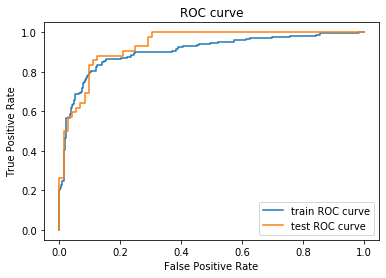

In [608]:
train_fpr, train_tpr, train_thresholds = roc_curve(train_y, pd.DataFrame(kmeans.transform(train_x)).iloc[:,0])
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, pd.DataFrame(kmeans.transform(test_x)).iloc[:,0])
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### iv. Spectral Clustering:
    Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit - predict method.

In [613]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

In [702]:
def spectral_clustering():
    result = []
    train_x, train_y, test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    
    

    clustering = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(train_x)
    labels = clustering.labels_
    
    #cluster index
    cluster_index0 = np.where(labels==0)
    cluster_index1 = np.where(labels==1)
    #find the majority label for each cluster
    majoritylabel0 = np.argmax(np.bincount(train_y[cluster_index0[0]]))
    majoritylabel1 = np.argmax(np.bincount(train_y[cluster_index1]))

    train_predict_labels = labels
    train_predict_labels[cluster_index0] = majoritylabel0
    train_predict_labels[cluster_index1] = majoritylabel1
    
    #train scores
    train_accuracy = accuracy_score(train_y, train_predict_labels)
   
    #precision
    train_cm = confusion_matrix(train_y, train_predict_labels)
    train_tn = train_cm[0][0]; 
    train_fp = train_cm[0][1]; 
    train_fn = train_cm[1][0]; 
    train_tp = train_cm[1][1];
    train_precision = train_tp/(train_tp + train_fp)

    #recall
    train_recall = train_tp/(train_tp + train_fn)
    
    #F-score
    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)

    
    #test ont test data
    test_labels = clustering.fit_predict(test_x)
    
    test_cluster_index0 = np.where(test_labels==0)
    test_cluster_index1 = np.where(test_labels==1)
    
    test_predict_labels = test_labels
    test_predict_labels[test_cluster_index0] = majoritylabel0
    test_predict_labels[test_cluster_index1] = majoritylabel1
    #scores
    test_accuracy = accuracy_score(test_y, test_predict_labels)

    #precision
    test_cm = confusion_matrix(test_y, test_predict_labels)
    test_tn = test_cm[0][0]; 
    test_fp = test_cm[0][1]; 
    test_fn = test_cm[1][0]; 
    test_tp = test_cm[1][1];
    test_precision = test_tp/(test_tp + test_fp)
    
    
    #recall
    test_recall = test_tp/(test_tp + test_fn)
    
    #F-score
    test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
    
    #AUC score
    test_dis = pairwise_distances(test_x, train_x, n_jobs=10)
    train_dis = pairwise_distances(train_x, train_x, n_jobs=10)
    train_min_0 = np.amin(train_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
    train_min_1 = np.amin(train_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
    train_min = np.concatenate((train_min_0, train_min_1), axis=1)
    train_pro_class0 = (train_min[:, 0] / np.sum(train_min, axis=1))
    test_min_0 = np.amin(test_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
    test_min_1 = np.amin(test_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
    test_min = np.concatenate((test_min_0, test_min_1), axis=1)
    test_pro_class0 = (test_min[:, 0] / np.sum(test_min, axis=1))
    train_auc = roc_auc_score(train_y, train_pro_class0)
    test_auc = roc_auc_score(test_y, test_pro_class0)

    
    result.append(train_accuracy)
    result.append(test_accuracy)
    result.append(train_precision)
    result.append(test_precision)
    result.append(train_recall)
    result.append(test_recall)
    result.append(train_f1)
    result.append(test_f1)
    result.append(train_auc)
    result.append(test_auc)
    
    return result

In [703]:
col = ['train_accuracy', 'test_accuracy', 'train_precision', 'test_precision', 
       'train_recall', 'test_recall', 'train_f1', 'test_f1','train_auc',"test_auc"]
spectral_result = pd.DataFrame(columns=col, index=range(30))
for i in range(30):
    res = spectral_clustering()
    spectral_result.loc[i] = res


In [704]:
print("The result of Spectral Learning:")
spectral_result.mean()

The result of Spectral Learning:


train_accuracy     0.881832
test_accuracy      0.520760
train_precision    0.958319
test_precision     0.564505
train_recall       0.714902
test_recall        0.507143
train_f1           0.818764
test_f1            0.516316
train_auc          0.594460
test_auc           0.615002
dtype: float64

In [568]:
train_x, train_y, test_x, test_y = split_dataset(normalize_dataset_x, dataset_y, 
                                                     test_size = 0.2,random = None)
train_y = np.array(train_y)
test_y = np.array(test_y)
    
clustering = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf').fit(train_x)
labels = clustering.labels_
    
    #cluster index
cluster_index0 = np.where(labels==0)
cluster_index1 = np.where(labels==1)

    #find the majority label for each cluster
majoritylabel0 = np.argmax(np.bincount(train_y[cluster_index0]))
majoritylabel1 = np.argmax(np.bincount(train_y[cluster_index1]))

train_predict_labels = labels
train_predict_labels[cluster_index0] = majoritylabel0
train_predict_labels[cluster_index1] = majoritylabel1
    
#confusion matrix of training data
train_cm = confusion_matrix(train_y, train_predict_labels)
    
#test ont test data
test_labels = clustering.fit_predict(test_x)
test_cluster_index0 = np.where(test_labels==0)
test_cluster_index1 = np.where(test_labels==1)


test_predict_labels = test_labels
test_predict_labels[test_cluster_index0] = majoritylabel0
test_predict_labels[test_cluster_index1] = majoritylabel1

test_cm = confusion_matrix(test_y, test_predict_labels)


In [569]:
train_cm = pd.DataFrame(train_cm, columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
train_cm

,Predict No,Predict Yes
Actual No,280,5
Actual Yes,46,124


In [570]:
test_cm = pd.DataFrame(test_cm, columns= ["Predict No", "Predict Yes"],
                        index = ["Actual No", "Actual Yes"] )
test_cm

,Predict No,Predict Yes
Actual No,72,0
Actual Yes,17,25


In [700]:
#ROC curve
test_dis = pairwise_distances(test_x, train_x, n_jobs=10)
train_dis = pairwise_distances(train_x, train_x, n_jobs=10)
train_min_0 = np.amin(train_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
train_min_1 = np.amin(train_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
train_min = np.concatenate((train_min_0, train_min_1), axis=1)
train_pro_class0 = (train_min[:, 0] / np.sum(train_min, axis=1))
test_min_0 = np.amin(test_dis[:,cluster_index0[0]], axis = 1).reshape(-1,1)
test_min_1 = np.amin(test_dis[:,cluster_index1[0]], axis = 1).reshape(-1, 1)
test_min = np.concatenate((test_min_0, test_min_1), axis=1)
test_pro_class0 = (test_min[:, 0] / np.sum(test_min, axis=1))

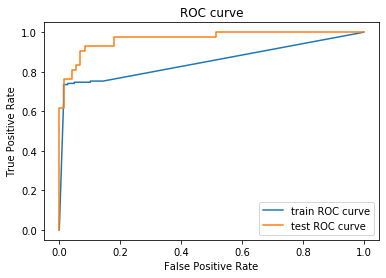

In [701]:
train_fpr, train_tpr, train_thresholds = roc_curve(train_y, train_pro_class0)
test_fpr, test_tpr, test_thresholds = roc_curve(test_y, test_pro_class0)
plt.plot(train_fpr, train_tpr, label='train ROC curve')
plt.plot(test_fpr, test_tpr, label='test ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [705]:
compare_table = pd.DataFrame({'supervised':supervised_result.mean(), 
                              'semi_supervised':semi_supervised_result.mean(),
                              'unsupervised':unsupervised_result.mean(), 
                              'spectral_unsupervised':spectral_result.mean()})
round(compare_table,4)

,supervised,semi_supervised,unsupervised,spectral_unsupervised
train_accuracy,0.9821,0.9690,0.8862,0.8818
test_accuracy,0.9681,0.9529,0.8880,0.5208
train_precision,0.9847,0.9675,0.9609,0.9583
test_precision,0.9619,0.9484,0.9528,0.5645
train_recall,0.9673,0.9494,0.7251,0.7149
test_recall,0.9524,0.9238,0.7325,0.5071
train_f1,0.9759,0.9581,0.8262,0.8188
test_f1,0.9565,0.9350,0.8272,0.5163
train_auc,0.9984,0.9929,0.9088,0.5945
test_auc,0.9949,0.9875,0.9170,0.6150


#### Conclusion:
    From the reslut table, I think supervised learning is better than semi-supervised learning. However, compare to unsupervised learning, supervised and semi-supervised learning are outperforms. In this dataset, all models are better to predict class0, but it's poorly to perdict class1.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: 
    https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is abinary classification problem.

In [336]:
from sklearn.model_selection import train_test_split

In [337]:
dataset_2 = pd.read_csv('data_banknote_authentication.txt', header=None)
dataset_2

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [338]:
dataset_x2 = dataset_2.iloc[:,:-1]
dataset_y2 = dataset_2[4]
dataset_x2.head()

,0,1,2,3
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [339]:
#split dataset 2 into training data and test data
train_x2, train_y2, test_x2, test_y2 = split_dataset(dataset_x2, dataset_y2, 
                                                     test_size = (472/(472+900)), random = None)

train_x2

,0,1,2,3
0,2.50680,1.158800,3.92490,0.125850
1,-2.59120,-0.105540,1.27980,1.041400
2,-0.38214,8.390900,2.16240,-3.740500
3,2.04660,2.030000,2.17610,-0.083634
4,1.96470,6.938300,0.57722,0.663770
...,...,...,...,...
895,-1.00500,0.084831,-0.24620,0.456880
896,-0.39816,5.978100,1.39120,-1.162100
897,-0.98540,-6.661000,5.82450,0.546100
898,0.34340,0.124150,-0.28733,0.146540


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty.
    Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [360]:
def select_10_sample(train_x2, train_y2):
    select_x = pd.DataFrame()
    select_y = pd.DataFrame()
    #try to keep balance of select sample
    while len(select_y) < 1 or len(np.bincount(select_y)) < 2 or np.bincount(select_y).min() < 2:
        rand_index = np.random.randint(0,train_x2.shape[0],10)
        select_x = train_x2.iloc[rand_index]
        select_y = train_y2.iloc[rand_index]
        
    unselect_x = train_x2.drop(train_x2.index[rand_index])
    unselect_y = train_y2.drop(train_y2.index[rand_index])
    
    #reset index
    select_x = select_x.reset_index(drop=True)
    select_y = select_y.reset_index(drop=True)
    unselect_x = unselect_x.reset_index(drop=True)
    unselect_y = unselect_y.reset_index(drop=True)
    return select_x, select_y, unselect_x, unselect_y

In [361]:
def passive_learning():
    train_x2, train_y2, test_x2, test_y2 = split_dataset(dataset_x2, dataset_y2, 
                                                     test_size = (472/(472+900)), random = None)
    #first select, get 10 sample as the first training data
    select_x, select_y, unselect_x, unselect_y = select_10_sample(train_x2, train_y2)
    passive_errors = list()
    
        
    for i in range(90):
        CV=5
        parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=CV)
        clf.fit(select_x, select_y)
        best_C = clf.best_params_['C']

        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(select_x, select_y)
        
        passive_errors.append(1-svc.score(test_x2, test_y2))
        
        if(i!=89):
            new_select_x = unselect_x.sample(n=10, replace=False, random_state=None, axis=0)
            rand_index = np.array(new_select_x.index)
            new_select_y = unselect_y.iloc[rand_index]
            unselect_x = unselect_x.drop(train_x2.index[rand_index])
            unselect_y = unselect_y.drop(train_y2.index[rand_index])
            
            #reset index
            unselect_x = unselect_x.reset_index(drop=True)
            unselect_y = unselect_y.reset_index(drop=True)
            select_x = pd.concat([select_x, new_select_x],axis=0, ignore_index=True)
            select_y = pd.concat([select_y, new_select_y],axis=0, ignore_index=True)
            
    return passive_errors

In [362]:
passive_result = list()
for i in range(50):
    print("complete", i, "times")
    error = passive_learning()
    passive_result.append(error)

complete 0 times
complete 1 times
complete 2 times
complete 3 times
complete 4 times
complete 5 times
complete 6 times
complete 7 times
complete 8 times
complete 9 times
complete 10 times
complete 11 times
complete 12 times
complete 13 times
complete 14 times
complete 15 times
complete 16 times
complete 17 times
complete 18 times
complete 19 times
complete 20 times
complete 21 times
complete 22 times
complete 23 times
complete 24 times
complete 25 times
complete 26 times
complete 27 times
complete 28 times
complete 29 times
complete 30 times
complete 31 times
complete 32 times
complete 33 times
complete 34 times
complete 35 times
complete 36 times
complete 37 times
complete 38 times
complete 39 times
complete 40 times
complete 41 times
complete 42 times
complete 43 times
complete 44 times
complete 45 times
complete 46 times
complete 47 times
complete 48 times
complete 49 times


In [391]:
passive_result = pd.DataFrame(passive_result).T
passive_result

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.055085,0.019068,0.023305,0.019068,0.019068,0.016949,0.016949,0.019068,0.016949,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.050847,0.052966,0.052966,0.046610,0.036017,0.141949,0.031780,0.029661,0.019068,0.014831,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
2,0.093220,0.080508,0.023305,0.025424,0.019068,0.019068,0.052966,0.010593,0.014831,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
3,0.036017,0.040254,0.012712,0.010593,0.025424,0.023305,0.033898,0.023305,0.023305,0.021186,...,0.008475,0.006356,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356
4,0.084746,0.069915,0.076271,0.059322,0.044492,0.044492,0.021186,0.014831,0.014831,0.010593,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.139831,0.129237,0.129237,0.110169,0.044492,0.046610,0.033898,0.031780,0.031780,0.065678,...,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
6,0.038136,0.046610,0.014831,0.014831,0.014831,0.012712,0.012712,0.016949,0.014831,0.016949,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
7,0.207627,0.084746,0.076271,0.021186,0.027542,0.027542,0.021186,0.019068,0.012712,0.016949,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
8,0.171610,0.080508,0.055085,0.016949,0.016949,0.025424,0.025424,0.025424,0.019068,0.019068,...,0.004237,0.004237,0.006356,0.006356,0.004237,0.004237,0.004237,0.004237,0.008475,0.008475
9,0.019068,0.050847,0.044492,0.016949,0.016949,0.012712,0.014831,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


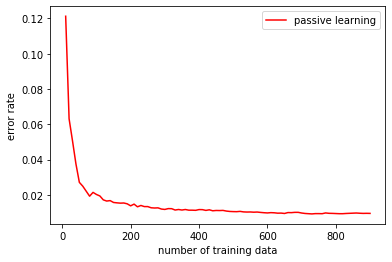

In [393]:
#plot the average result
plt.plot(np.arange(1,91)*10, passive_result.mean(), c='r',label='passive learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

####  ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty.
    Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [383]:
def active_learning():
    train_x2, train_y2, test_x2, test_y2 = split_dataset(dataset_x2, dataset_y2, 
                                                     test_size = (472/(472+900)), random = None)
    #first select, get 10 sample as the first training data
    select_x, select_y, unselect_x, unselect_y = select_10_sample(train_x2, train_y2)
    active_errors = list()
    
        
    for i in range(90):
        CV=5
        parameters = {'C':np.power(10, np.arange(-3, 7,0.5))}
        svc = LinearSVC(penalty='l1', dual=False)
        clf = GridSearchCV(svc, parameters, cv=CV)
        clf.fit(select_x, select_y)
        best_C = clf.best_params_['C']

        # Refit the model with the best params
        svc = LinearSVC(penalty='l1', dual=False, C=best_C)
        svc.fit(select_x, select_y)
        
        active_errors.append(1-svc.score(test_x2, test_y2))
        
        if(i!=89):
            distances = svc.decision_function(unselect_x)
            closest = np.argsort(abs(distances))[:10]
            new_select_x = unselect_x.iloc[closest,:]
            new_select_y = unselect_y.iloc[closest]
            unselect_x = unselect_x.drop(train_x2.index[closest])
            unselect_y = unselect_y.drop(train_y2.index[closest])
            
            #reset index
            unselect_x = unselect_x.reset_index(drop=True)
            unselect_y = unselect_y.reset_index(drop=True)
            select_x = pd.concat([select_x, new_select_x],axis=0, ignore_index=True)
            select_y = pd.concat([select_y, new_select_y],axis=0, ignore_index=True)
            
    return active_errors

In [384]:
active_result = list()
for i in range(50):
    print("complete", i, "times")
    error = active_learning()
    active_result.append(error)

complete 0 times
complete 1 times
complete 2 times
complete 3 times
complete 4 times
complete 5 times
complete 6 times
complete 7 times
complete 8 times
complete 9 times
complete 10 times
complete 11 times
complete 12 times
complete 13 times
complete 14 times
complete 15 times
complete 16 times
complete 17 times
complete 18 times
complete 19 times
complete 20 times
complete 21 times
complete 22 times
complete 23 times
complete 24 times
complete 25 times
complete 26 times
complete 27 times
complete 28 times
complete 29 times
complete 30 times
complete 31 times
complete 32 times
complete 33 times
complete 34 times
complete 35 times
complete 36 times
complete 37 times
complete 38 times
complete 39 times
complete 40 times
complete 41 times
complete 42 times
complete 43 times
complete 44 times
complete 45 times
complete 46 times
complete 47 times
complete 48 times
complete 49 times


In [387]:
active_result_df = pd.DataFrame(active_result)
active_result_df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.135593,0.023305,0.025424,0.021186,0.016949,0.006356,0.006356,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.091102,0.038136,0.014831,0.008475,0.014831,0.006356,0.008475,0.006356,0.006356,0.006356,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
2,0.120763,0.010593,0.031780,0.012712,0.008475,0.012712,0.006356,0.014831,0.012712,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712
3,0.175847,0.014831,0.019068,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,...,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.010593,0.010593,0.010593
4,0.220339,0.029661,0.016949,0.101695,0.044492,0.025424,0.023305,0.019068,0.012712,0.014831,...,0.023305,0.021186,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
5,0.110169,0.116525,0.023305,0.025424,0.025424,0.016949,0.012712,0.008475,0.010593,0.008475,...,0.008475,0.010593,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.184322,0.091102,0.023305,0.016949,0.029661,0.019068,0.008475,0.008475,0.004237,0.010593,...,0.008475,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.008475
7,0.029661,0.139831,0.019068,0.010593,0.074153,0.029661,0.014831,0.012712,0.012712,0.014831,...,0.016949,0.016949,0.016949,0.012712,0.016949,0.016949,0.016949,0.012712,0.012712,0.012712
8,0.141949,0.025424,0.074153,0.061441,0.029661,0.023305,0.021186,0.016949,0.010593,0.010593,...,0.008475,0.010593,0.008475,0.010593,0.010593,0.010593,0.021186,0.010593,0.010593,0.010593
9,0.154661,0.021186,0.040254,0.019068,0.008475,0.008475,0.006356,0.006356,0.006356,0.006356,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356


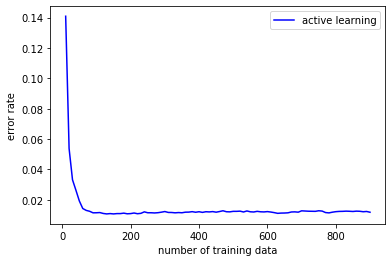

In [389]:
#plot the average result
plt.plot(np.arange(1,91)*10, active_result_df.mean(), c='b',label='active learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

#### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. 
    By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

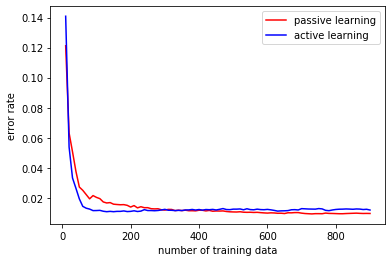

In [395]:
plt.plot(np.arange(1,91)*10, passive_result.mean() , c='r',label='passive learning')
plt.plot(np.arange(1,91)*10, active_result_df.mean(), c='b', label='active learning')
plt.xlabel('number of training data')
plt.ylabel('error rate')
plt.legend()
plt.show()

##### conclusion:
    After ploting two curves in one plot. We can directly see thay active learning is better when number of trianging data is small. Howeverm, with the increase of number of training data, the passive learning will become as well as active learning. Due to the randomly select of training and test data, the last error rate is not same. If we always use the same trainging data and test data, we might gain the same error rate while using the whole training data to train model. This result just base on my own experiment. It might be influenced by the select of training data and test data.